# Homework 5 - Explore California and Nevada with graphs

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm 

In [1]:
from matplotlib import pyplot as plt
import random
import csv
import sys

Importing data from a .zip file

In [2]:
df = pd.read_csv('C:\\Users\\lucas\\OneDrive\\Desktop\\ADM-HW5\\USA-road-d.CAL.gr.gz', compression='gzip', header=0, sep=',', quotechar='"')
#importing data directly from compressed file 

In [3]:
df = df[6:]  #taking only data we are looking for 

In [4]:
df.rename(columns = {'c 9th DIMACS Implementation Challenge: Shortest Paths':'arc'},inplace = True)

In [5]:
df.head()

,arc
6,a 1 1048577 456
7,a 1048577 1 456
8,a 2 1048578 2389
9,a 1048578 2 2389
10,a 3 1048579 358


In [6]:
list_df = df.values.tolist() #turning the dataframe into a list

In [7]:
lis_df = []
for i in list_df:
    lis_df.append(list(map(int,(i[0].split())[1:])))
#creating another list to use it in the function

In [8]:
from collections import defaultdict

link  = defaultdict(list)   #node with linked nodes
weight = defaultdict(list)  #dictionary with weight converted into a list
graph = lis_df              #list of node  

for i in range(len(lis_df)):
    id_node1 = graph[i][0]
    id_node2 = graph[i][1]
    w =graph[i][2] 
    
    link[id_node1].append(id_node2)
    
    w_k = str(id_node1) +',' +(str(id_node2))
    weight[w_k].append(w)

In [9]:
def Find_Link(graph,v,weight,k):
    distance = {}
    for item in link.keys():
        distance[item] = np.inf
    distance[v] = 0
    queue, output = [],[]
    queue.append(v)
    output.append(v)
    connection = []

    while queue:
        v = queue[0]
        queue.pop(0)
        for u in link[v]:
            w_k = str(v)+','+str(u)
            if len(weight[w_k])>0:
                if distance[u] > distance[v] + weight[w_k][0]:
                    distance[u] = distance[v] + weight[w_k][0]
                    if distance[u] != np.inf and distance[u] <= k:
                        queue.append(u)
                        output.append(u)
                        connection.append(w_k)
                    
    return output,connection

In [10]:
def WhichNode():
    print('Which node do you want to check?')
    n = int(input())
    print('Which is tha maximum distance you want?')
    t = int(input())
    result = Find_Link(link,n,weight,t)
    print(result)

In [11]:
WhichNode()

Which node do you want to check?
4
Which is tha maximum distance you want?
10000
([4, 1049993, 1767, 1048577, 1785, 2588], ['4,1049993', '1049993,1767', '1767,1048577', '1767,1785', '1785,2588'])


## Frontend


In [ ]:
#to go on we will print the previuos example

In [13]:
result = Find_Link(link,4,weight,10000)

conn = result[1] 
conn

['4,1049993', '1049993,1767', '1767,1048577', '1767,1785', '1785,2588']

In [14]:
G = nx.Graph()

In [15]:
for i in conn:
    k = list(map(int,(i.split(','))))
    G.add_node(k[0])
    G.add_node(k[1])
    G.add_edge(k[0], k[1], weight = weight[i][0])

In [16]:
import matplotlib.pyplot as plt

C:\Users\lucas\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


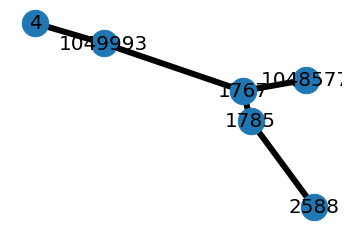

In [17]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

# 2

In [ ]:
## read Distance data and create list
with open('USA-road-d.CAL.gr', 'r') as f: 
    distance_data = f.readlines()
#create list
distance_data = distance_data[7:len(distance_data)]
distance_data = [list(map(int,j[2:-1].split())) for j in distance_data]

#creat dataframe
distance_df=pd.DataFrame(distance_data, columns= ['Node1', 'Node2', 'traveldistance'])
distance_df.head()

In [ ]:
## read Travel time  data and create list    
with open('USA-road-t.CAL.gr', 'r') as f: 
    times_data = f.readlines()
    
#create list  
times_data = times_data[7:len(times_data)]
times_data = [list(map(int,j[2:-1].split())) for j in times_data]

#creat dataframe
time_df=pd.DataFrame(times_data, columns= ['Node1', 'Node2', 'traveltime'])
time_df.head()

In [ ]:
## read Coordinate  data and create list        
with open('USA-road-d.CAL.co', 'r') as f: 
    coordinates_data = f.readlines()
    
#create list      
coordinates_data = coordinates_data[7:len(coordinates_data)]
coordinates_data = [list(map(int,j[2:-1].split())) for j in coordinates_data]

#creat dataframe
coordinates_df=pd.DataFrame(coordinates_data, columns= ['node', 'latitude', 'longitude'])
coordinates_df.head()

In [ ]:
#join dataframes
time_distance = pd.merge(left=distance_df, right=time_df, left_on=['Node1', 'Node2'], right_on=['Node1', 'Node2'], how='inner')

new_df = pd.merge(left=time_distance, right=coordinates_df, left_on='Node2', 
                                     right_on='node', how='left', suffixes=('_1','_2'))
new_df = pd.merge(left=new_df, right=coordinates_df, left_on='Node1', right_on='node', 
                           how='left', suffixes=('_1','_2'))
del new_df['node_1'], new_df['node_2'] 

new_df.head()

## 2.2 Find the smartest Network

In [ ]:
# choose input nodes
#input_nodes=input('please enter number from1 to 1800000=   ')
input_nodes=[10,6,100]

In [ ]:
#choose threshold and parts of all nodes
input_data=coordinates_df[[i in input_nodes for i in coordinates_df['node'].values]]
threshold_minmax=input_data.agg(['min','max'])
treshhold_info = coordinates_df[(coordinates_df['latitude'] >= (threshold_minmax.at["min","latitude"]-50000)) & 
                  (coordinates_df['latitude'] <= (threshold_minmax.at["max","latitude"]+50000)) & 
                  (coordinates_df['longitude'] >= (threshold_minmax.at["min","longitude"]-50000)) & 
                  (coordinates_df['longitude'] <= (threshold_minmax.at["max","longitude"]+50000))]
treshhold_info.head()

In [ ]:
nides_list=list(treshhold_info['node'])
adjacent_nodes = new_df[(new_df.Node1.isin(nides_list))&(new_df.Node2.isin(nides_list))]
adjacent_nodes.head()

In [ ]:
#change index of nodes

edges = adjacent_nodes[['Node1','Node2','traveldistance']].copy()

v = np.unique(adjacent_nodes['Node1'].values)
k = range(1,len(np.unique(adjacent_nodes['Node1'].values))+1)
key_val = np.zeros((len(np.unique(adjacent_nodes['Node1'].values)),2))
key_val[:,0] = k
key_val[:,1] = v
index2node = dict(key_val)
key_val[:,0] = v
key_val[:,1] = k
node2index = dict(key_val)
edges['Node1'].replace(node2index, inplace=True)
edges['Node2'].replace(node2index, inplace=True)
edges = edges.astype(np.int)
edges.head()

In [ ]:
from math import inf
from itertools import product
# n is nodes number

def floyd(n, edge):
    nodes_number = range(n)
    
    distance = [[inf] * n for i in nodes_number]
    interface  = [[0]   * n for i in nodes_number]
    
    for i in nodes_number:
        distance[i][i] = 0
        
    for u, v, w in edge:
        distance[u-1][v-1] = w
        interface[u-1][v-1] = v-1
        
    for k, i, j in product(nodes_number, repeat=3):
        sum_distance = distance[i][k] + distance[k][j]
        
        if distance[i][j] > sum_distance:
            distance[i][j] = sum_distance
            interface[i][j]  = interface[i][k]      
            
    return distance,interface

In [ ]:
[distance_mat,interface_mat]=floyd(len(treshhold_info), list(edges.values))

In [ ]:
#find indexes of input nodes
node_new_index=[node2index[x].astype(np.int) for x in input_nodes]
node_new_index

In [ ]:
len(distance_mat)

In [ ]:
# find shortest path between pair of nodes
min_dist=len(distance_data) # giving a big number to min

for i, j in product(node_new_index, repeat=2):
    if i != j:
        path = [i]  
        while path[-1] != j:
            path.append(interface_mat[path[-1]][j])
        if distance_mat[i][j]<min_dist:
            min_dist=distance_mat[i][j]
            first_node=i
            sum_dist=0
            
shortest_path={} # between nodes

while len(node_new_index)>1: 
    min_dist=len(distance_data)
    for i in range(len(node_new_index)):
        if first_node != node_new_index[i]:
            if distance_mat[first_node][node_new_index[i]]<min_dist:
                min_dist=distance_mat[first_node][node_new_index[i]]
                next_node=node_new_index[i]
                
    path = [first_node]  
    while path[-1] != next_node:
        path.append(interface_mat[path[-1]][next_node])
        
    node_new_index.remove(first_node) #remove the node we are in
    
    first_node=next_node
    for node in path:
        if node==0:
            path.remove(node)
    shortest_path[min_dist]=path

In [ ]:
path_route = []
total_dist = 0
for i in shortest_path:
        path_route += shortest_path[i][:-1]
        total_dist += i
path_route.append(path[-1])

In [ ]:
path_nodes=[index2node[x].astype(np.int) for x in path_route]
print(' → '.join(str(p) for p in path_nodes))

# 3

## 3.1 Data collection

In this point we create datasets starting from the file we download 

In [ ]:
G=[]
features=['Node 1', 'Node 2', 'Distance']
with open('C:/Users/Ela/Desktop/HW5/USA-road-d.CAL.gr', 'r') as f:
    for line in f:
        if line[0] == 'a':
            n1, n2, d= map(int, line[2::].split())
            G.append([n1,n2,d])

In [ ]:
T=[]
features=['Node 1', 'Node 2', 'Travel Time']
with open('C:/Users/Ela/Desktop/HW5/USA-road-t.CAL.gr', 'r') as f:
    for line in f:
        if line[0] == 'a':
            n1, n2, d= map(int, line[2::].split())
            T.append([n1,n2,d])


In [ ]:
#DICTIONARY OF DISTANCE DATA
nodes_neig = dict()  #Dictionary with keys as all nodes and values as a nested list includes a nist with neigbor as element 0 and distance between them as element 1

for elm in G:
    if elm[0] in nodes_neig:
        nodes_neig[elm[0]].append([elm[1],elm[2]])
    else:
        nodes_neig[elm[0]] = [[elm[1],elm[2]]]

In [ ]:
#DICTIONARY OF TRAVEL TIME DATA
nodes_neig1 = dict()  #Dictionary with keys as all nodes and values as a nested list includes a nist with neigbor as element 0 and distance between them as element 1

for elm in T:
    if elm[0] in nodes_neig1:
        nodes_neig1[elm[0]].append([elm[1],elm[2]])
    else:
        nodes_neig1[elm[0]] = [[elm[1],elm[2]]]

In [ ]:
print(nodes_neig[1])
print(len(nodes_neig[1]))

## 3.2

In [ ]:
#First example for Dijkstra, which learned from https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm

def ShortestOPathTrial(H,lst,G):
    visited=[]
    lst.insert(0,H)
    unvisited=lst
    unv=unvisited
    sdistance= dict() #dictionary of shortest distances from the selected node H
    inf=sys.maxsize
    for i in unvisited:
        if i==H:
            sdistance[i]=0
        else:
            sdistance[i]=inf
    c=0
    p=H
    for _ in range(len(unvisited)-1):
        sdis=list() #distance list
        nei=list() #neigbors list
        for i in range(len(G[p])):
            if G[p][i][0] in unv: 
                nei.append(G[p][i][0])
                sdis.append(G[p][i][1])
        for x in range(len(nei)):
            if c+sdis[x]<sdistance[nei[x]] and nei[x] in unv:
                sdistance[nei[x]]=c+sdis[x]
        c+=min(sdis)
        unv.remove(p)  #after visiting the neigbor, romoves from the unvisited list
        p=nei[sdis.index(min(sdis))] #the new neihbor to look at is the one with the minimum distance
    return sdistance[unvisited[-1]], sdistance

#Little size example graph
H=1
lst= [2,3,4,5]
G={1:[[3,6],[2,1]],2:[[1,1],[3,2],[4,1]],3:[[1,6],[2,2],[4,2],[5,5]],4:[[2,1],[3,2],[5,5]],5:[[3,5],[4,5]]}
ShortestOPathTrial(H,lst,G)


In [ ]:
#Finding the nodes between 2 different nodes
def findNodesInBtw(node1, node2):
    nset=set()
    nq=set()
    for t in range(len(nodes_neig[node1])):
        nset.add(nodes_neig[node1][t][0])
    for j in nset.copy():
        if node2 not in nset:
               for k in range(len(nodes_neig[j])):
                          nq.add(nodes_neig[j][k][0])
                          nset=nq
        else:
            break
    for t in range(len(nodes_neig[node2])):
        nset.add(nodes_neig[node2][t][0])
    return list(nset)


def ShortestOPath(H,lst,G,a):
    visited=[]
    unvisited=lst
    unv=unvisited
    for jj in unv.copy():  #to update size of the list copy function used
        for t in range(len(nodes_neig[jj])):
            if nodes_neig[jj][t][0] not in unv:
                unv.append(nodes_neig[jj][t][0])
    unv=set(unv)
    sdistance= dict() #dictionary of shortest distances from the selected node H
    inf=sys.maxsize
    for i in unv: #initializing the distance dictionary(to the starting node) with 0 if the node is the starting node otheerwise infinity
        if i==H:
            sdistance[i]=0
        else:
            sdistance[i]=inf
    c=0
    p=H
    for _ in range(len(unvisited)-1):
        visited.insert(len(visited),p)
        sdis=list() #distance list
        nei=list()  #neighbor list
        if p in G.keys():
             for i in range(len(G[p])):
                if G[p][i][0] in unv: #If the node in needed data dictionary is also in unvisited
                    nei.append(G[p][i][0])
                    sdis.append(G[p][i][1])
        else:
            G[p]=nodes_neig[p]
            for i in range(len(G[p])):
                if G[p][i][0] in unv: 
                        nei.append(G[p][i][0])
                        sdis.append(G[p][i][1])
        for x in range(len(nei)):
            if c+sdis[x]<sdistance[nei[x]] and nei[x] in unv: #If the path we follow has a total distance smaller than the distance assigned before(to the start node)
                sdistance[nei[x]]=c+sdis[x]
        c+=min(sdis) #add the min distance to find the total shortest distance to p_n
        unv.remove(p) #after visiting the neigbor, romoves from the unvisited list
        p=nei[sdis.index(min(sdis))] #the new neihbor to look at is the one with the minimum distance
        if sdistance[a]!=inf:
            break
    return sdistance[a], visited


In [ ]:
def mainFunc(start,orderlist): #The Function which finds the path, total distance and all the nodes in the future graph
    totaldist=0
    orderlist.insert(0,start)
    G={}
    path=[]
    graphNodes=[]
    for elm in range(len(orderlist)-1):
        nodesInBtw=findNodesInBtw(orderlist[elm], orderlist[elm+1]) 
        nodesInBtw.insert(len(nodesInBtw),orderlist[elm+1])
        for aa in range(len(nodesInBtw)):
            graphNodes.append(nodesInBtw[aa])
        a=nodesInBtw[-1]
        features=['Node 1', 'Node 2', 'Distance']
        with open('C:/Users/Ela/Desktop/HW5/USA-road-d.CAL.gr', 'r') as f:  #Creating a dictionary with data from only needed nodes
            for line in f:
                if line[0] == 'a':
                    n1, n2, d= map(int, line[2::].split())
                    if n1 in nodesInBtw:  #For the needed nodes, getting the neigbor and distance info
                            if n1 in G.keys(): 
                                G[n1].append([n2,d])
                            else:
                                G[n1]=[[n2,d]]
        c,b=ShortestOPath(orderlist[elm],nodesInBtw,G,a)
        totaldist+=c
        for pp in range(len(b)): #add all visited nodes to path
            path.append(b[pp])
    path.insert(len(path),orderlist[-1]) #lastly add the destination node
    return path, totaldist, graphNodes
    
strt=1
plist=[3,4,1820]

p,tot, allnodes=mainFunc(strt, plist)
print(p) #The shortest path for the required inputs

In [ ]:
## read Coordinate  data and create list        
with open('C:/Users/Ela/Desktop/HW5/USA-road-d.CAL.co', 'r') as f: 
    coordinates_data = f.readlines()
    
#create list      
coordinates_data = coordinates_data[7:len(coordinates_data)]
coordinates_data = [list(map(int,j[2:-1].split())) for j in coordinates_data]

#creat dataframe
coordinates_df=pd.DataFrame(coordinates_data, columns= ['node', 'latitude', 'longitude'])
coordinates_df.head()

## 3.3 Creating the Graph

In [ ]:
G= nx.Graph() #Empty graph
for index in allnodes:
    G.add_node(index)
for k in range(len(allnodes)-1): #Adding edges between the 'between nodes'
            e=(allnodes[k],allnodes[k+1])
            G.add_edge(*e,color='blue')
for idx in range(len(p)-1):  #Trying to add the path route different color nodes
    G.add_edge(p[idx],p[idx+1], color='red')

color='blue'

pos = {}
for ind in G.nodes(): #Getting the coordinates of nodes from the coordinates dataframe
    a=list(coordinates_df[coordinates_df.node==ind]['longitude'])
    b=list(coordinates_df[coordinates_df.node==ind]['latitude'])
    pos[ind] = (a[0] , b[0])

plt.clf()
nx.draw(G, pos=pos,with_labels=True,font_size=9, edge_color=color)
plt.figure(10,figsize=(50,50))
plt.show()